Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best Model Parameters:  {'C': 0.01, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
Результати з завантаженою моделлю:
              precision    recall  f1-score   support

         0.0       0.89      0.81      0.85      6315
         1.0       0.86      0.92      0.89      8064

    accuracy                           0.87     14379
   macro avg       0.88      0.87      0.87     14379
weighted avg       0.88      0.87      0.87     14379

Test Accuracy (Loaded Model):  0.8739133458515891
Test Recall (Loaded Model):  0.9236111111111112
Test Precision (Loaded Model):  0.8615384615384616
Test F1 Score (Loaded Model):  0.8914956011730205


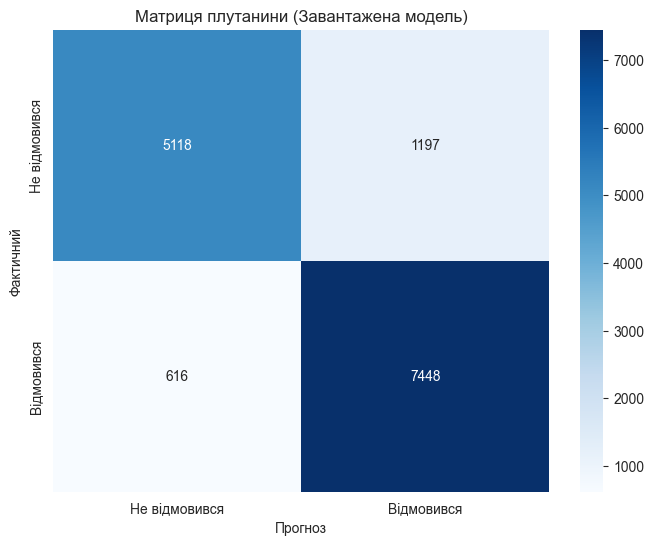

In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import pickle
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


file_path = '../data/internet_service_churn_updated.csv'
data = pd.read_csv(file_path)

# Попередня обробка даних
X = data.drop(columns=['churn'])
y = data['churn']

# Розділення на тренувальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабування тільки числових даних
scaler = StandardScaler()
float_columns = ['subscription_age', 'reamining_contract', 'download_avg', 'upload_avg']
X_train[float_columns] = scaler.fit_transform(X_train[float_columns])
X_test[float_columns] = scaler.transform(X_test[float_columns])

# Модель логістичної регресії
logistic_model = LogisticRegression(random_state=42)

# Параметрична сітка для логістичної регресії
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1','l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 500, 1000]
}

# Налаштування GridSearchCV з крос-валідацією
grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid, cv=5, scoring='recall', verbose=1)

# Навчання моделі з кращими параметрами
grid_search.fit(X_train, y_train)

# Отримання найкращої моделі
best_model = grid_search.best_estimator_

# Збереження найкращої моделі
model_save_path = '../models/logistic_regression_model.pkl'
with open(model_save_path, 'wb') as file:
    pickle.dump(best_model, file)

# Передбачення на тестовому наборі даних
y_pred = best_model.predict(X_test)

# Оцінка моделі на тестових даних з найкращими параметрами
print("Best Model Parameters: ", grid_search.best_params_)

# Завантаження найкращої моделі
with open(model_save_path, 'rb') as file:
    loaded_model = pickle.load(file)

# Передбачення на тестовому наборі даних з завантаженою моделлю
y_pred_loaded = loaded_model.predict(X_test)

# Перевірка, що завантажена модель працює правильно
print("Результати з завантаженою моделлю:")
print(classification_report(y_test, y_pred_loaded))

# Оцінка моделі на тестових даних з найкращими параметрами (для завантаженої моделі)
print("Test Accuracy (Loaded Model): ", accuracy_score(y_test, y_pred_loaded))
print("Test Recall (Loaded Model): ", recall_score(y_test, y_pred_loaded))
print("Test Precision (Loaded Model): ", precision_score(y_test, y_pred_loaded))
print("Test F1 Score (Loaded Model): ", f1_score(y_test, y_pred_loaded))

# Матриця плутанини для завантаженої моделі
cm_loaded = confusion_matrix(y_test, y_pred_loaded)

# Візуалізація матриці плутанини для завантаженої моделі
plt.figure(figsize=(8, 6))
sns.heatmap(cm_loaded, annot=True, fmt='d', cmap='Blues',
xticklabels=['Не відмовився', 'Відмовився'],
yticklabels=['Не відмовився', 'Відмовився'])
plt.xlabel('Прогноз')
plt.ylabel('Фактичний')
plt.title('Матриця плутанини (Завантажена модель)')
plt.show()